# Creating climatology and weather map of AR event
Created by Eric S. Martinez  
July 15, 2021

### Loading libraries

In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature

### Importing data

In [2]:
fn_1999 = '/Users/atoc_reu_student/Downloads/ERA5/Data/era5_sl_Dec1999_global_snowfall_1979_2020.nc'
fn_mean = '/Users/atoc_reu_student/Downloads/ERA5/Data/era5_sl_Decmean_global_snowfall_1979_2020.nc'
sf_1999_full = xr.open_mfdataset(fn_1999)
sf_mean_full = xr.open_mfdataset(fn_mean)

In [3]:
sf_1999 = sf_1999_full.sf
sf_mean = sf_mean_full.sf

### Slicing data to specific location over Thwaites Ice Shelf

In [4]:
# 250.5, 263.5, -74, -76
sf_1999_tg = sf_1999.sel(latitude=slice(-73.5, -76.5), longitude=slice(245.5,270.5)).mean(dim='time')
sf_mean_tg = sf_mean.sel(latitude=slice(-73.5, -76.5), longitude=slice(245.5,270.5)).mean(dim='time')

### Converting *sf_mean_tg* to millimeters

In [19]:
sf_mean_tg = sf_mean_tg*(10**3)
sf_1999_tg = sf_1999_tg*(10**3)

### Plotting climatology

/Users/atoc_reu_student/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/atoc_reu_student/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


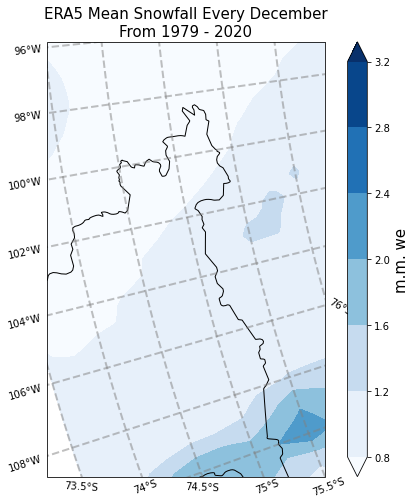

In [20]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), subplot_kw=dict(projection=ccrs.Orthographic(central_latitude=-90)))
ax.coastlines()
ax.add_feature(cfeature.LAND,color='k')

im = ax.contourf(sf_mean_tg.longitude, sf_mean_tg.latitude, sf_mean_tg, 
                 transform = ccrs.PlateCarree(), 
                 cmap = 'Blues',
#                  levels = np.arange(0,80,5),
                 extend = 'both')
# (239.5,269.5) longitude
# (-60, -90) latitude
ax.set_extent([250.5, 263.5, -74, -75.7])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# latitude = (-74, 76)
# longitude = (280, 285)

cbar = f.colorbar(im)
cbar.set_label('m.m. we', fontsize = 15)
ax.set_title('ERA5 Mean Snowfall Every December\n' + 'From 1979 - 2020', fontsize = 15)
f.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_map_mean_snowfall_climatology_tg.jpg", dpi = 100)


### Plotting weather map

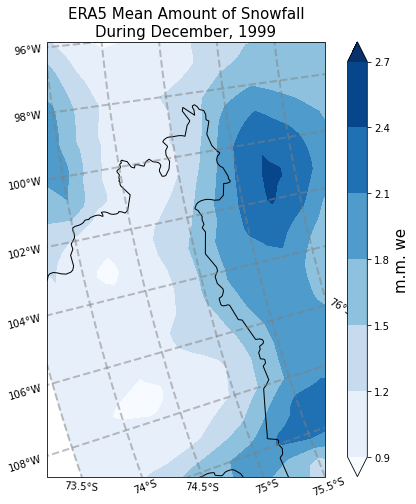

In [21]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), subplot_kw=dict(projection=ccrs.Orthographic(central_latitude=-90)))
ax.coastlines()
ax.add_feature(cfeature.LAND,color='k')

im = ax.contourf(sf_1999_tg.longitude, sf_1999_tg.latitude, sf_1999_tg, 
                 transform = ccrs.PlateCarree(), 
                 cmap = 'Blues',
#                  levels = np.arange(0,80,5),
                 extend = 'both')
# (239.5,269.5) longitude
# (-60, -90) latitude
ax.set_extent([250.5, 263.5, -74, -75.7])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# latitude = (-74, 76)
# longitude = (280, 285)

cbar = f.colorbar(im)
cbar.set_label('m.m. we', fontsize = 15)
ax.set_title('ERA5 Mean Amount of Snowfall\n' + 'During December, 1999', fontsize = 15)
f.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_map_mean_snowfall_1999_tg.jpg", dpi = 100)


## Plotting original plot location

### Slicing data to specific location over Thwaites Ice Shelf

In [5]:
sf_1999_tg_ogl = sf_1999.sel(latitude=slice(-60, -90), longitude=slice(239.5,269.5)).mean(dim='time')
sf_mean_tg_ogl = sf_mean.sel(latitude=slice(-60, -90), longitude=slice(239.5,269.5)).mean(dim='time')

### Converting to millimeters

In [6]:
# climatology
sf_mean_tg_ogl = sf_mean_tg_ogl*1000
sf_mean_tg_ogl_per_month = sf_mean_tg_ogl*24

# weather map
sf_1999_tg_ogl = sf_1999_tg_ogl*1000
sf_1999_tg_ogl_per_month = sf_1999_tg_ogl*24

### Plotting climatology

/Users/atoc_reu_student/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/atoc_reu_student/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


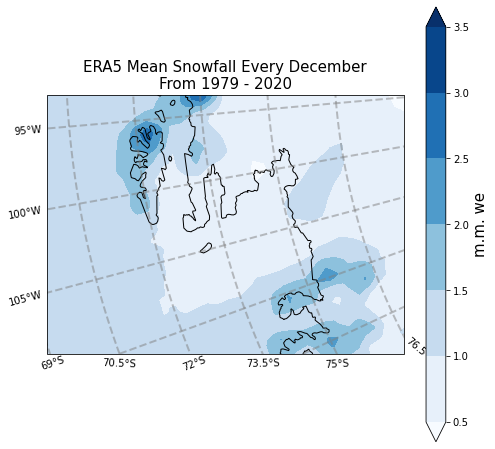

In [24]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), subplot_kw=dict(projection=ccrs.Orthographic(central_latitude=-90)))
ax.coastlines()
ax.add_feature(cfeature.LAND,color='k')

im = ax.contourf(sf_mean_tg_ogl_per_month.longitude, sf_mean_tg_ogl_per_month.latitude, sf_mean_tg_ogl_per_month, 
                 transform = ccrs.PlateCarree(), 
                 cmap = 'Blues',
#                  levels = np.arange(0,80,5),
                 extend = 'both')
# (239.5,269.5) longitude
# (-60, -90) latitude
ax.set_extent([250.5, 265.5, -70, -77.3])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# latitude = (-74, 76)
# longitude = (280, 285)

cbar = f.colorbar(im)
cbar.set_label('m.m. we', fontsize = 15)
ax.set_title('ERA5 Mean Snowfall Every December\n' + 'From 1979 - 2020', fontsize = 15)
f.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_map_mean_snowfall_climatology_og.jpg", dpi = 100)


### Plotting weather map

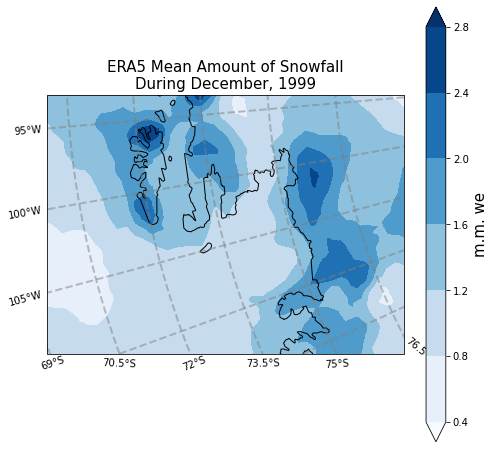

In [25]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), subplot_kw=dict(projection=ccrs.Orthographic(central_latitude=-90)))
ax.coastlines()
ax.add_feature(cfeature.LAND,color='k')

im = ax.contourf(sf_1999_tg_ogl.longitude, sf_1999_tg_ogl.latitude, sf_1999_tg_ogl, 
                 transform = ccrs.PlateCarree(), 
                 cmap = 'Blues',
#                  levels = np.arange(0,80,5),
                 extend = 'both')
# (239.5,269.5) longitude
# (-60, -90) latitude
ax.set_extent([250.5, 265.5, -70, -77.3])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# latitude = (-74, 76)
# longitude = (280, 285)

cbar = f.colorbar(im)
cbar.set_label('m.m. we', fontsize = 15)
ax.set_title('ERA5 Mean Amount of Snowfall\n' + 'During December, 1999', fontsize = 15)
f.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_map_mean_snowfall_1999_og.jpg", dpi = 100)


## Trying to put both figures in one plot

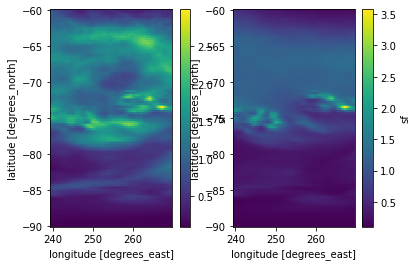

In [26]:
plt.subplot(1,2,1)
sf_1999_tg_ogl.plot()
plt.subplot(1,2,2)
sf_mean_tg_ogl.plot()

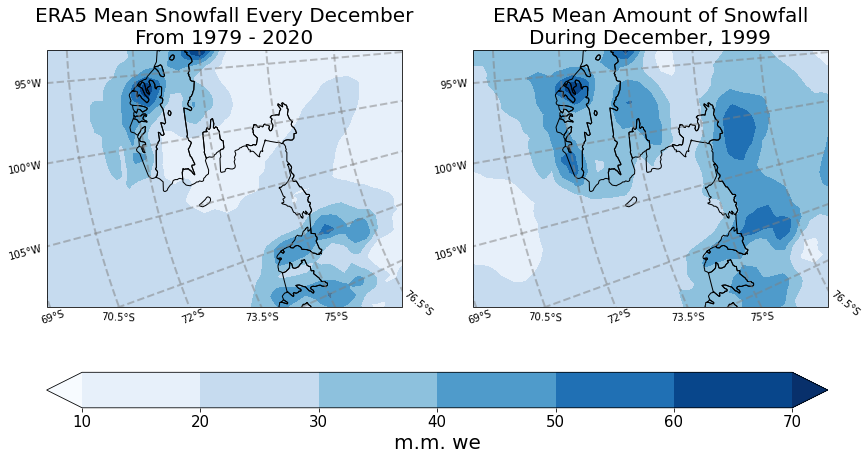

In [12]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,8), subplot_kw=dict(projection=ccrs.Orthographic(central_latitude=-90)))
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='black',
                                        facecolor='none') # 10m, 50m, 110m
ax[0].add_feature(land_50m)
iceshelves_50m = cfeature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_polys', '10m',
                                        edgecolor='black',
                                        facecolor='none') # only 10m or 50m 
ax[0].add_feature(iceshelves_50m)

im = ax[0].contourf(sf_mean_tg_ogl_per_month.longitude, sf_mean_tg_ogl_per_month.latitude, sf_mean_tg_ogl_per_month, 
                 transform = ccrs.PlateCarree(), 
                 cmap = 'Blues',
                 levels = np.arange(10,75,10),
                 extend = 'both')
# (239.5,269.5) longitude
# (-60, -90) latitude
ax[0].set_extent([250.5, 265.5, -70, -77.3])
gl = ax[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# latitude = (-74, 76)
# longitude = (280, 285)

# cbar = f.colorbar(im)
# cbar.set_label('m.m. we', fontsize = 15)
ax[0].set_title('ERA5 Mean Snowfall Every December\n' + 'From 1979 - 2020', fontsize = 20)
# f.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_map_mean_snowfall_climatology_og.jpg", dpi = 100)

ax[1].add_feature(land_50m)
ax[1].add_feature(iceshelves_50m)

im = ax[1].contourf(sf_1999_tg_ogl_per_month.longitude, sf_1999_tg_ogl_per_month.latitude, sf_1999_tg_ogl_per_month, 
                 transform = ccrs.PlateCarree(), 
                 cmap = 'Blues',
                 levels = np.arange(10,75,10),
                 extend = 'both')
# (239.5,269.5) longitude
# (-60, -90) latitude
ax[1].set_extent([250.5, 265.5, -70, -77.3])
gl = ax[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# latitude = (-74, 76)
# longitude = (280, 285)

cbar = f.colorbar(im, ax = ax, orientation = 'horizontal', shrink = 1)
cbar.ax.tick_params(labelsize=15)
cbar.set_label('m.m. we', fontsize = 20)
ax[1].set_title('ERA5 Mean Amount of Snowfall\n' + 'During December, 1999', fontsize = 20)
f.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_climatology_vs_weather.jpg", dpi = 100)
